# Handwritten character recognion

Import libraries

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPool2D
from tensorflow.keras.optimizers import SGD, Adam # not from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

Read the data

In [2]:
dataset = pd.read_csv('..\datasets\A_Z Handwritten Data\A_Z Handwritten Data.csv').astype('float32') # import dataset
dataset.rename(columns={'0':"label"}, inplace=True) # rename the first column as label for 'Letters'

Split data into images and their labels

In [3]:
X = dataset.drop("label", axis = 1) # remove the fist column  
y = dataset["label"] # taking the first column

print(X.shape, y.shape)

(372450, 784) (372450,)


Reshaping the data in the csv file so that it can be displayed as an image

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # the shape here is (297960,784) and (74490, 784)

X_train = np.reshape(X_train.values, (X_train.shape[0], 28, 28)) # X_train.shape[0] is the row number, i.e., 297960
X_test = np.reshape(X_test.values, (X_test.shape[0], 28, 28)) # X_test.shape[0] is the row number, i.e., 74490

print("Train data shape: ", X_train.shape)
print("Test data shape: ", X_test.shape)

Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [5]:
word_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'J', 
             10:'K', 11:'L', 12:'M', 13:'N', 14:'O', 15:'P', 16:'Q', 17:'R', 18:'S', 
             19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y', 25:'Z'}
print(word_dict)

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


Plotting the number of alphabets in the dataset

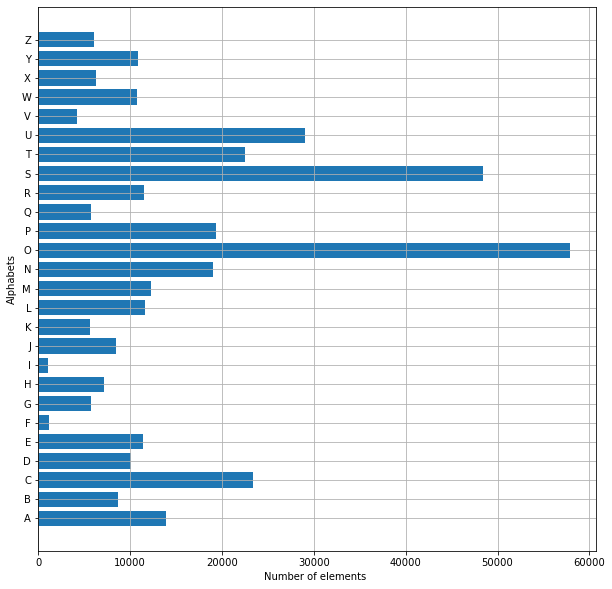

In [6]:
y_int = np.int0(y) # int0 = int64, y_int.shape = (1, 372450)

count = np.zeros(26, dtype='int') # print(count)

for i in y_int: # y_int is a row matrix with elements whose vales are between 1 and 16
    count[i] += 1 # this accumulates the values in the count matrix # print(count)

alphabets = [letter for letter in word_dict.values()]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ") # the count row matrix
plt.ylabel("Alphabets")
plt.grid()
plt.show()

Shuffling the data

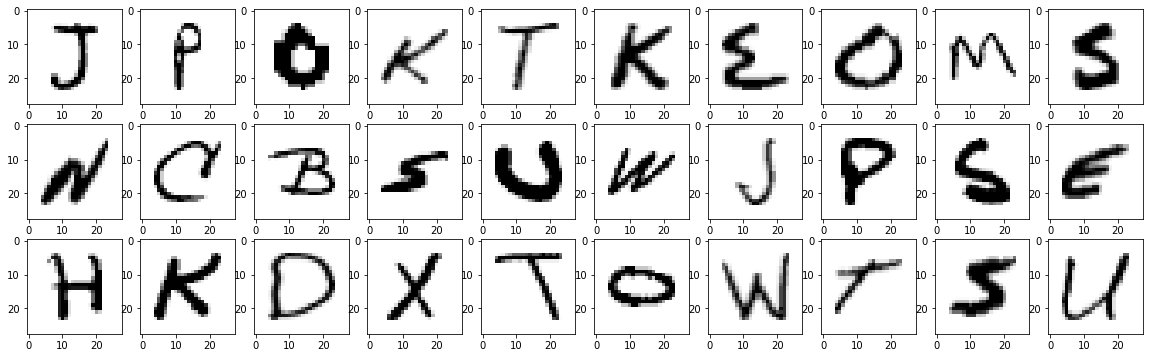

In [7]:
shuffled_data = shuffle(X_train[:100])
rows, cols = 10, 3

plt.figure(figsize=(20,6))

for i in range(rows * cols):
    plt.subplot(cols, rows, i + 1)
    plt.imshow(np.reshape(shuffled_data[i], (28,28)), interpolation='nearest', cmap='Greys') # cmap='gray'

### Data Reshaping for the model input

In [8]:
# adding one dimention here, black and white channel. becauyse the CNN takes a tensor. 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
print("New shape of train data: ", X_train.shape)

X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
print("New shape of test data: ", X_test.shape, "\n")

# the categories are A-Z hence 26 categories

y_train_OHE = to_categorical(y_train, num_classes = 26, dtype='int64')
print("New shape of train labels: ", y_train_OHE.shape)

y_test_OHE = to_categorical(y_test, num_classes = 26, dtype='int64')
print("New shape of test labels: ", y_test_OHE.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1) 

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [9]:
y_test_OHE

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

### Define the CNN model

In [10]:
model = Sequential()

# feature extraction
model.add(Conv2D(filters=32, kernel_size = 3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size = 3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size = 3, activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

# classification
model.add(Flatten())

model.add(Dense(64, activation='relu',))
model.add(Dense(128, activation='relu',))

model.add(Dense(26, activation='softmax',))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

Compiling and fitting the model

In [11]:
model.compile(optimizer=Adam(learning_rate=0.001), # combination of RMSprop and Adagram optimizing algorithms
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_OHE, epochs=1, validation_data=(X_test, y_test_OHE))

model.summary()

9312/9312 [==============================] - 46s 5ms/step - loss: 0.1627 - accuracy: 0.9553 - val_loss: 0.0809 - val_accuracy: 0.9767
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)        

Getting the Train and Validaiton Accuracies and Losses

In [12]:
print("The validaion accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validaion loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validaion accuracy is : [0.9766814112663269]
The training accuracy is : [0.9552557468414307]
The validaion loss is : [0.08088389784097672]
The training loss is : [0.16265951097011566]


### Doing Some Prediction on Test Data

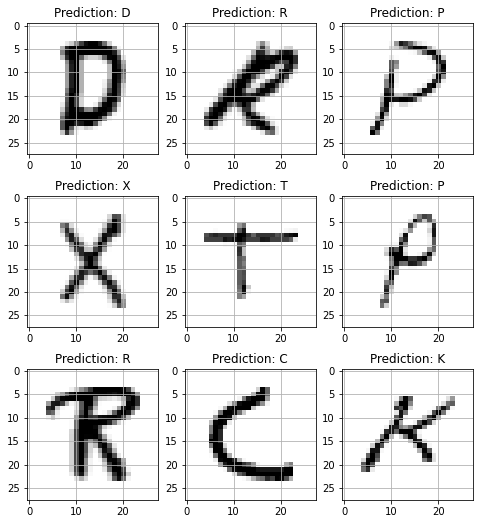

In [20]:
fig, axes = plt.subplots(3,3,figsize =(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(X_test[i], (28,28))
    ax.imshow(img, cmap='Greys')

    pred = word_dict[np.argmax(y_test_OHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

### Doing Prediction on External Image

In [14]:
img = cv2.imread(r'../_cotet/test-images/download.png') # path to image file
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # converted from BGR to RGB
img = cv2.resize(img, (400,440)) # resize the image to our required dimensions

Processing on the copied image

In [15]:
img_copy =cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY) # to greyscale
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV) # thresholding because keeps the image smooth without any sort of haz gray colors in the image that could lead to wring predictions

img_final = cv2.resize(img_thresh, (28,28)) # resized into the dimensions that the model takes as input
img_final = np.reshape(img_final, (1, 28, 28, 1)) # reshaping so that it can be used as model input

In [16]:
img_pred = word_dict[np.argmax(model.predict(img_final))]

cv2.putText(img, "Dataflair _ _ _ ", (20,25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color = (0,0,230))
cv2.putText(img, "Prediction: " + img_pred, (20,410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color = (255,0,30))
cv2.imshow('Dataflair handwritten character recognition _ _ _ ', img)

while (1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
cv2.destroyAllWindows()